In [19]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/home/behzad-azadi2693/Desktop/ML_base/age_salary.csv')

In [7]:
X = df.iloc[: ,[2,3]].values
X.shape

(400, 2)

In [8]:
y = df.iloc[:, 4].values
y.shape

(400,)

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
Xtrain.shape

(320, 2)

In [11]:
Xtest.shape

(80, 2)

In [12]:
%%capture
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [13]:
classifier = SVC(kernel = 'linear', random_state=0)

In [14]:
classifier.fit(Xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [21]:
r_ages     = np.arange(start = Xtest[:, 0].min() , stop =Xtest[:, 0].max() , step =0.01)
r_salaries = np.arange(start = Xtest[:, 1].min() , stop =Xtest[:, 1].max() , step =0.01)
X1, X2 = np.meshgrid(r_ages, r_salaries)
test = np.array([X1.ravel(), X2.ravel()]).T                 # test.shape  :  (160328, 2)\n",
pred = classifier.predict(test)      
z = pred.reshape(X1.shape)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


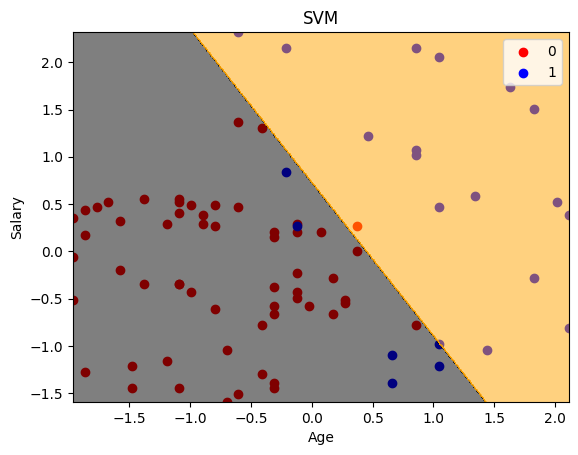

In [22]:
plt.scatter( Xtest [ytest == 0, 0], Xtest [ytest == 0, 1], c = ListedColormap(('r', 'b'))(0), label=0 )
plt.scatter( Xtest [ytest == 1, 0], Xtest [ytest == 1, 1], c = ListedColormap(('r', 'b'))(1), label=1 )
plt.contourf(X1,X2,z, alpha=0.5, cmap = ListedColormap(('k', 'orange')))    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best')